In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

In [2]:
QAP_INSTANCE_URL = 'https://qaplib.mgi.polymtl.ca/data.d/nug12.dat'

qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

line = qap_instance_file.readline()
n = int(line.decode()[:-1].split()[0])


A = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    A[i, :] = list(map(int, line.decode()[:-1].split()))

B = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    B[i, :] = list(map(int, line.decode()[:-1].split()))

In [19]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[int(p[i]), p.astype(int)]).sum()
    return s

def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

def kendall_tau_distance(p, q):
    inversions = 0
    for i in range(len(p)):
        for j in range(i+1, len(p)):
            pi_order = p[i] - p[j]
            qi_order = q[i] - q[j]
            if np.sign(pi_order) != np.sign(qi_order):
                inversions += 1
    return inversions

def simulated_annealing(T, radius, alpha):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    
    distances = []
    cost_differences = []

    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        delta = q_cost - p_cost
        if delta < 0:
            dist = kendall_tau_distance(p, q)
            distances.append(dist)
            cost_differences.append(-delta)  # f(p) - f(q), delta is f(q) - f(p)
            p, p_cost = q, q_cost
        else:
            acceptance_probability = np.exp(- alpha * delta * t/T)
            if np.random.rand() < acceptance_probability:
                p, p_cost = q, q_cost
        costs[t] = p_cost

    print("Time taken: {:.2f} seconds, Minimum cost found: {}".format(time.time() - t0, costs.min()))

    plt.figure(figsize=(10, 6))
    plt.scatter(distances, cost_differences, alpha=0.5, label='Data points')

    unique_distances = np.unique(distances)
    avg_deltas = [np.mean([cost_differences[i] for i in range(len(distances)) if distances[i] == dist]) for dist in unique_distances]
    
    plt.plot(unique_distances, avg_deltas, color='red', label='Average Improvement', linewidth=2)


    plt.title('Objective Function Improvement vs. Permutation Distance')
    plt.xlabel('Kendall Tau Distance between p and q')
    plt.ylabel('Improvement in Objective Function (f(p) - f(q))')
    plt.grid(True)
    plt.legend()
    plt.show()

Running Simulated Annealing with T=5000, radius=1, alpha=0.01
Time taken: 0.34 seconds, Minimum cost found: 616.0


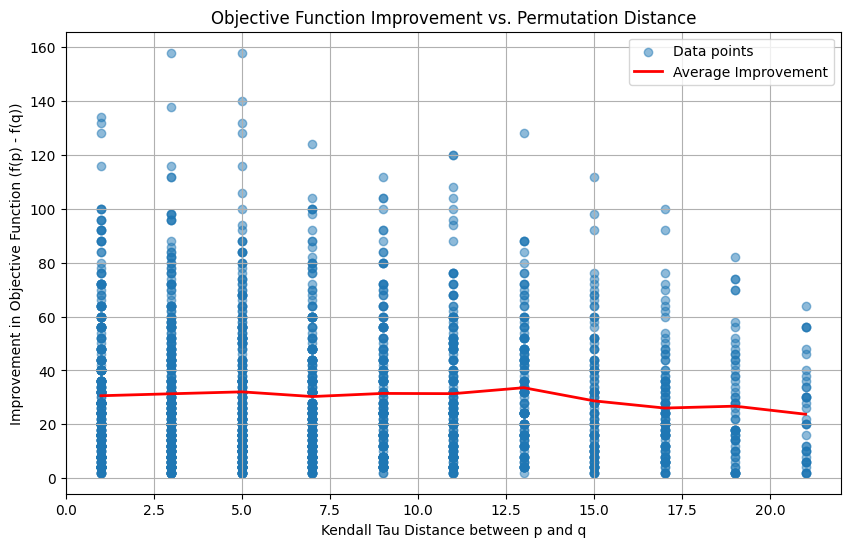

In [20]:
print("Running Simulated Annealing with T=5000, radius=1, alpha=0.01")
simulated_annealing(T=5000, radius=1, alpha=0.01)